<h2 style ="font-family:Bell MT;font-size:80px:text-align:center"> Dawnload all the neccessary libraries <h2/>

In [13]:
import sys 
import spectral
from spectral import * # dawnload all the package of spetral
import spectral.io.envi as envi # ENVI is a software package for processing and analyzing geospacial imagery.
import matplotlib.pyplot as plt
import matplotlib as plot
%matplotlib inline
from PIL import Image
import warnings
warnings.filterwarnings('ignore') # don't display warnnings
#sys.path

<h3 style ="font-family:Bell MT;font-size:80px:text-align:center"> Opening the data cube and get some statstical information. <h3/>
<h3 style ="font-family:Bell MT;font-size:80px:text-align:center"> This data cube (Image data ) is our feature to predict each pixel according to their target value (mineral) class. So this data cube is our 'X'  (predictor) variable.But needs some preproccess before trainning the machine<h3/>

In [14]:
img = open_image('frt00008fc1_07_if166j_mtr3.hdr') # OPenning the image

In [15]:
img.__class__ 

spectral.io.bsqfile.BsqFile

In [91]:
print(img) # Getting the general image information

	Data Source:   '.\.\frt00008fc1_07_if166j_mtr3.img'
	# Rows:            798
	# Samples:         819
	# Bands:           489
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32


In [92]:
img.shape # check the image size , so the image has 798 rows with 819 colums and 489 bands

(798, 819, 489)

<p style ="font-family:Bell MT;font-size:80px:text-align:center">As it is shown in the above statstical summary about the data cube , the image is 798 rows by 819 columns with 489 bands (indexs). <p/>

<h3 style ="font-family:Bell MT;font-size:80px:text-align:center">Extracting a specific pixel from the data cube and plotting the spectral signature(wavelengths with it's intensity or reflectance in particular pixel) <h3/>

In [18]:
samp1 = img[50,100]
samp1.shape # Extracts a specific pixel located in the 51th row and 101th column with all the bands(489)

(489,)

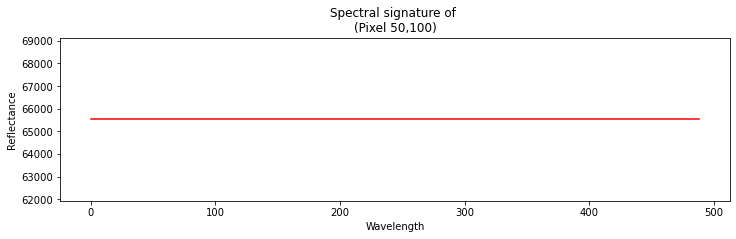

In [19]:
plt.figure(figsize=(12,3)) 
plt.plot(samp1, color ="red")
plt.title('Spectral signature of \n(Pixel {},{})'.format(
    50, 100))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

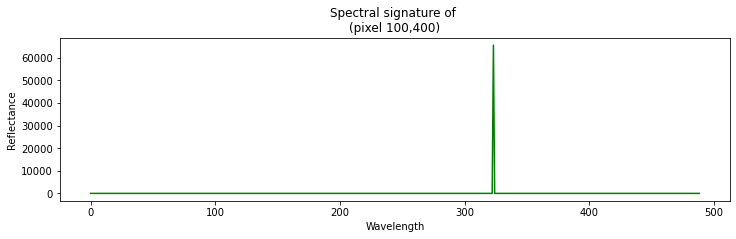

In [20]:
plt.figure(figsize=(12,3))
samp2 = img[100,400]
plt.plot(samp2, color ="green")
plt.title('Spectral signature of \n(pixel {},{})'.format(100,400))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

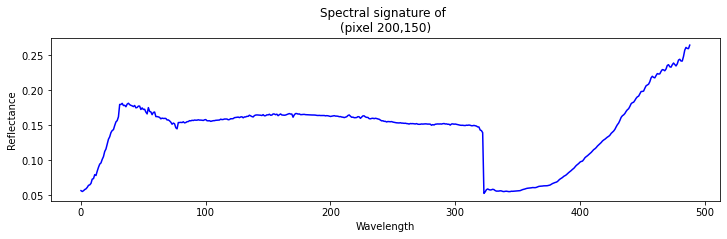

In [21]:
plt.figure(figsize=(12,3))
samp3 = img[200,150]
plt.plot(samp3, color ="blue")
plt.title('Spectral signature of \n(pixel {},{})'.format(200,150))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

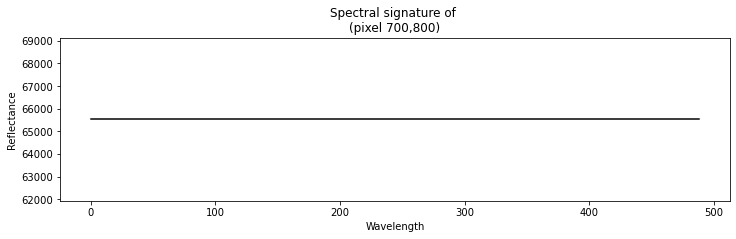

In [22]:
plt.figure(figsize=(12,3))
samp4 = img[700,800]
plt.plot(samp4, color ="black")
plt.title('Spectral signature of \n(pixel {},{})'.format(700,800))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

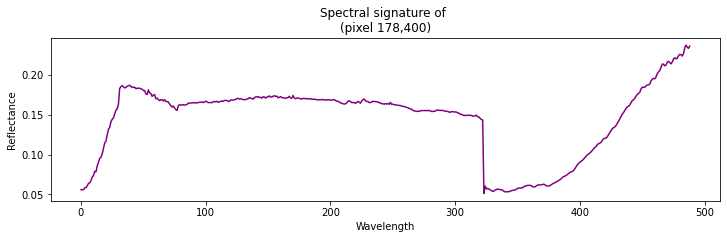

In [23]:
plt.figure(figsize=(12,3))
samp5 = img[178,400]
plt.plot(samp5, color ="purple")
plt.title('Spectral signature of \n(pixel {},{})'.format(178,400))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

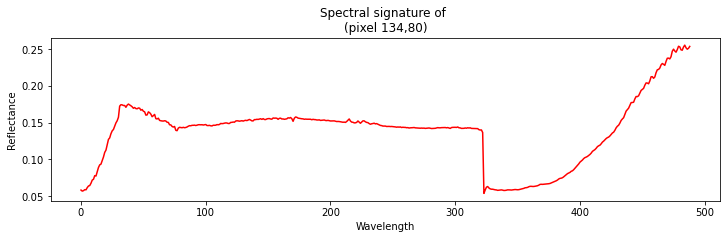

In [24]:
plt.figure(figsize=(12,3))
samp5 = img[134,80]
plt.plot(samp5, color ="red")
plt.title('Spectral signature of \n(pixel {},{})'.format(134,80))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

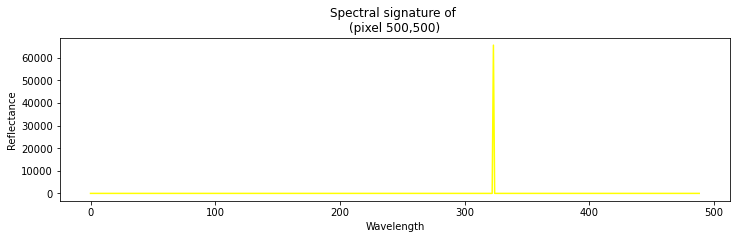

In [25]:
plt.figure(figsize=(12,3))
samp6 = img[500,600]
plt.plot(samp6, color ="yellow")
plt.title('Spectral signature of \n(pixel {},{})'.format(500,500))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

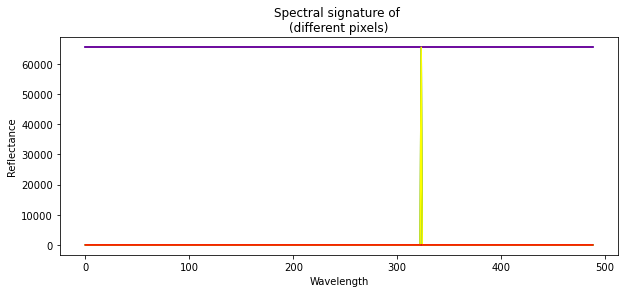

In [26]:
plt.figure(figsize= (10,4)) # The above individual pixels plotting all together
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')

plt.plot(samp1, color ="blue")
plt.plot(samp2, color ="green")
plt.plot(samp3, color ="black")
plt.plot(samp4, color ="purple")
plt.plot(samp6, color ="yellow")
plt.plot(samp5, color ="red")

plt.title('Spectral signature of \n(different pixels)')
plt.show()

In [27]:
ba10 = img[:,:,90] # Extract the image only at the 91th index or displaying band 91th with its rows and columns
ba10.shape

(798, 819, 1)

In [28]:
 arr = img.load() # To improve the performance of spectral algorithms, it is good to load the entire image 
                  # into memory using the load methods. And it returns an ImageArray. 

In [29]:
arr.__class__

spectral.image.ImageArray

In [30]:
print(arr.info()) # Here we can see the general information of the image and we can see that the shape of the data 
                  # in the form of rowsXcolumnsXbands and the format of the ImageArray objects is 
                  # 32-bit floating point value which makes it big according to memory consumtion. 

	# Rows:            798
	# Samples:         819
	# Bands:           489
	Data format:   float32


In [31]:
arr.shape

(798, 819, 489)

In [32]:
img = envi.open('frt00008fc1_07_if166j_mtr3.hdr', 'frt00008fc1_07_if166j_mtr3.img')

In [33]:
lib = envi.open('frt00008fc1_07_if166j_mtr3.hdr')
lib

	Data Source:   '.\frt00008fc1_07_if166j_mtr3.img'
	# Rows:            798
	# Samples:         819
	# Bands:           489
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32

<h3 style ="font-family:Bell MT;font-size:80px:text-align:center"> Extracting indivisual indexs (wavelengths) and visualize it. <h3/>

ImageView object:
  Display bands       :  (70, 20, 400)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.12479069083929062, 65535.0]
    G: [0.09635287523269653, 65535.0]
    B: [0.041280657052993774, 65535.0]

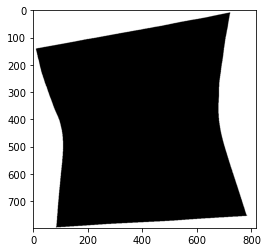

In [34]:
img = open_image('frt00008fc1_07_if166j_mtr3.hdr') 
view = imshow(img, (70, 20, 400)) # The three number in brackets represents the channals of the band red, blue and green.
view # imshow function shows raster display of data associated with np.ndarray 
     # and the image corresponds to the above rgb which is in visible bands.

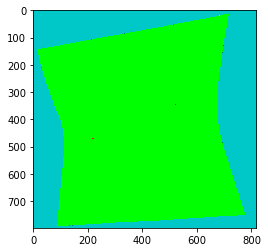

In [35]:
gt = open_image('frt00008fc1_07_if166j_mtr3.hdr').read_band(0)
view = imshow(classes=gt) # Displaying ground truth image (collection of information at the particular location.)
                          # that allows the image data tobe related to real features and materials on the ground.
                          # so in this case the materials are the menirals (area covered by menirals). 
# This data is mostly used to accesses the performance of image classification where each pixel of the image is compared 
# with corresponding ground truth data to find a match.The aim is to minimize the error between the ground truth and the 
# CRISM image.May be it shows us the area covered by information in each pixel and the area which doesn't have an information.

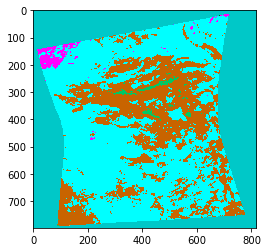

In [36]:
gt = open_image('frt00008fc1_07_if166j_mtr3.hdr').read_band(200)
view = imshow(classes=gt) # Ground truth at band 200

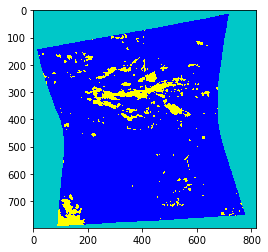

In [37]:
gt = open_image('frt00008fc1_07_if166j_mtr3.hdr').read_band(400)
view = imshow(classes=gt) # Ground truth at band 400

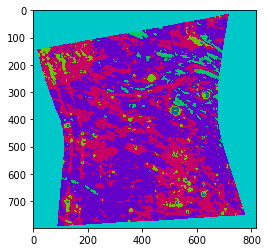

In [38]:
gt = open_image('frt00008fc1_07_if166j_mtr3.hdr').read_band(488)
view = imshow(classes=gt) # Ground truth at band 488

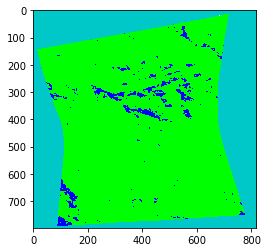

In [39]:
gt = open_image('frt00008fc1_07_if166j_mtr3.hdr').read_band(10)
view = imshow(classes=gt) # Ground truth at band 10

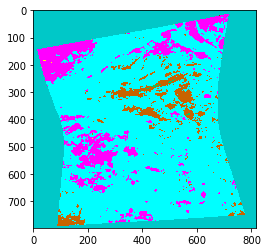

In [40]:
gt = open_image('frt00008fc1_07_if166j_mtr3.hdr').read_band(300)
view = imshow(classes=gt) # Ground truth at band 10

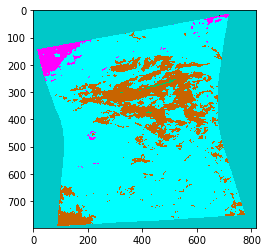

In [41]:
gt = open_image('frt00008fc1_07_if166j_mtr3.hdr').read_band(100)
view = imshow(classes=gt) # Ground truth at band 100

In [42]:
gt.shape # check the shape of the ground truth image

(798, 819)

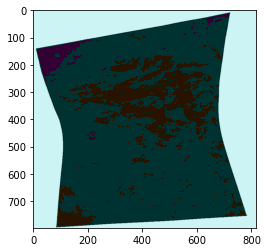

In [43]:
view = imshow(img, (30, 20, 10), classes=gt)
view.set_display_mode('overlay')
view.class_alpha = 0.2 # Displays the image with overlayed class masks, using
                       # an alpha transparency of 0.2.

In [44]:
import spectral.io.aviris as aviris
img.bands = aviris.read_aviris_bands('frt00008fc1_07_if166j_mtr3.hdr') # want to Plot the spectra associated with their wavelengths.

ValueError: could not convert string to float: 'file'

In [ ]:
spectral.settings.WX_GL_DEPTH_SIZE = 16 # To reduce the size of the depth 

In [ ]:
view_cube(img, bands=[29, 19, 9]) # To view the datacube

<h3 style ="font-family:Bell MT;font-size:80px:text-align:center"> Let's  check the target (the 9 band) image size is the same with the predictor image size. Yes as we can see above the image sizes are the same which is 798 rows with 819 columns with a tresholded single band at "BD1900_2_". So the image sizes are equal. But, the origional data cube has 489 wavelength bands we have to extract the same wevelength band with the our predictor image should be extracted.That means exactly the same wavelength value with the predictor. <h3/>

In [56]:
y1 = m_image = plt.imread('1_BD1900_2_Thresholded.png') # It opens directly in the form of numpy array
y1.shape

(798, 819)

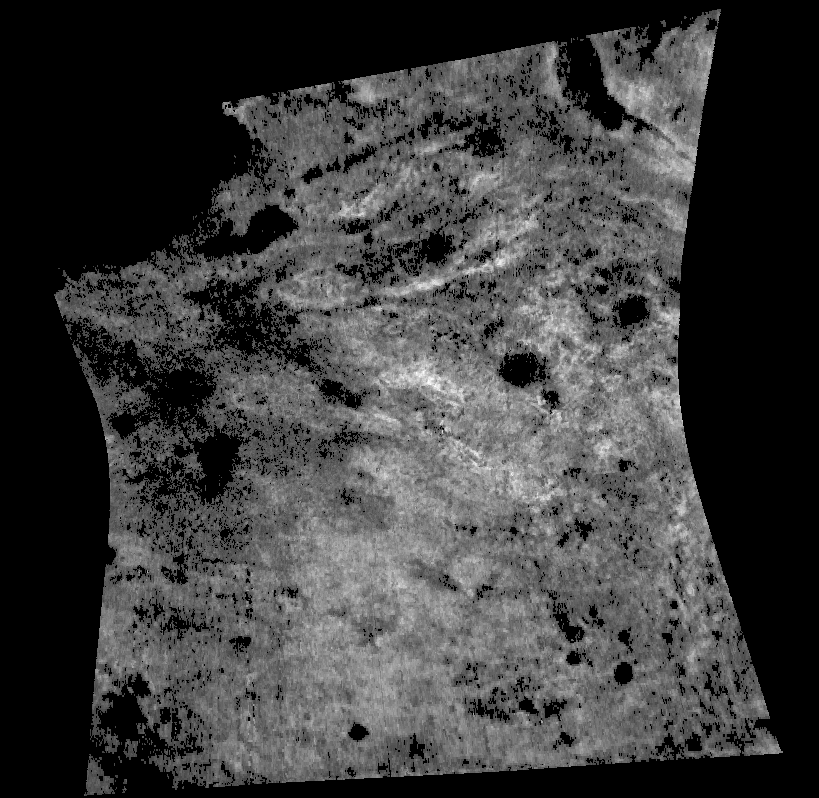

In [57]:
y11 = Image.open("1_BD1900_2_Thresholded.png")
y11

In [58]:
y2 = m_image = plt.imread('2_BD2100_2_Thresholded.png') # It opens directly in the form of numpy array
y2.shape

(798, 819)

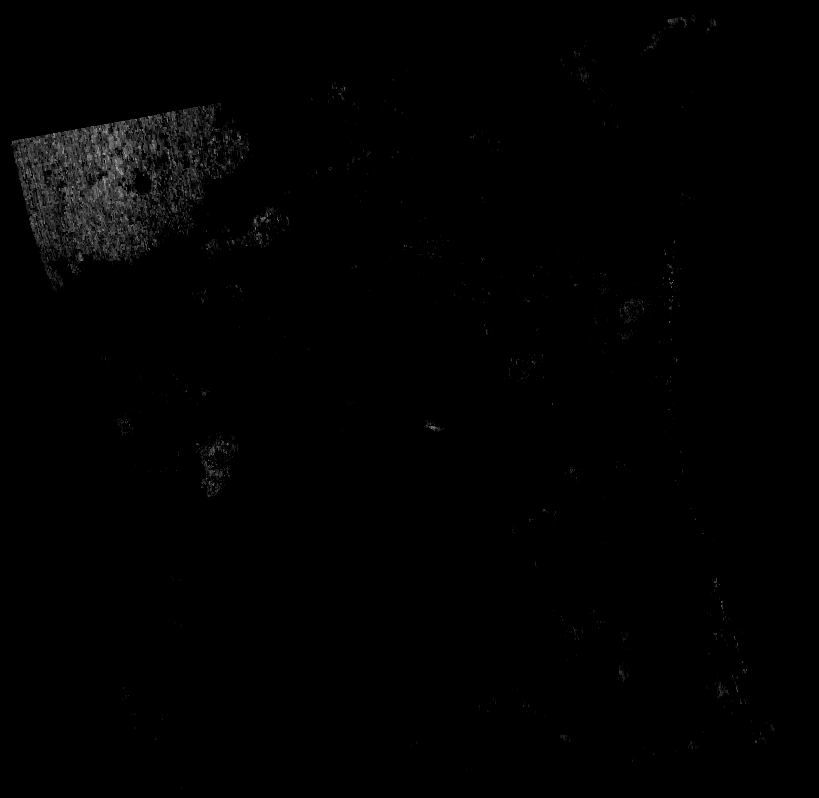

In [59]:
y12 = Image.open("2_BD2100_2_Thresholded.png")
y12

In [60]:
y3 = m_image = plt.imread('3_BDI1000VIS_Thresholded.png') # It opens directly in the form of numpy array
y3.shape

(798, 819)

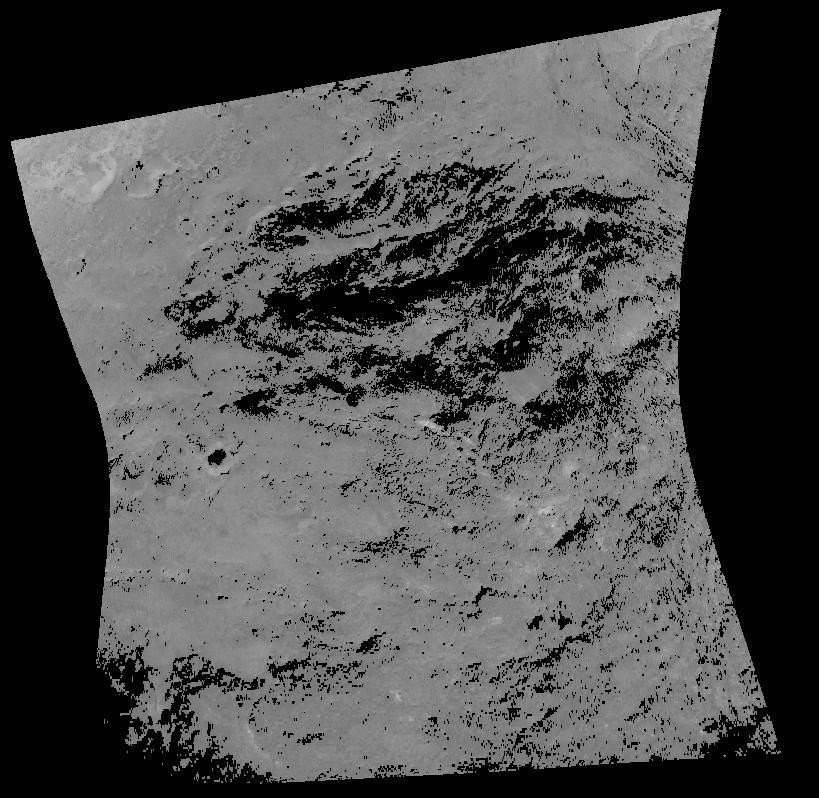

In [61]:
y13 = Image.open("3_BDI1000VIS_Thresholded.png")
y13

In [62]:
y4 = m_image = plt.imread('4_D2300_Thresholded.png') # It opens directly in the form of numpy array
y4.shape

(798, 819)

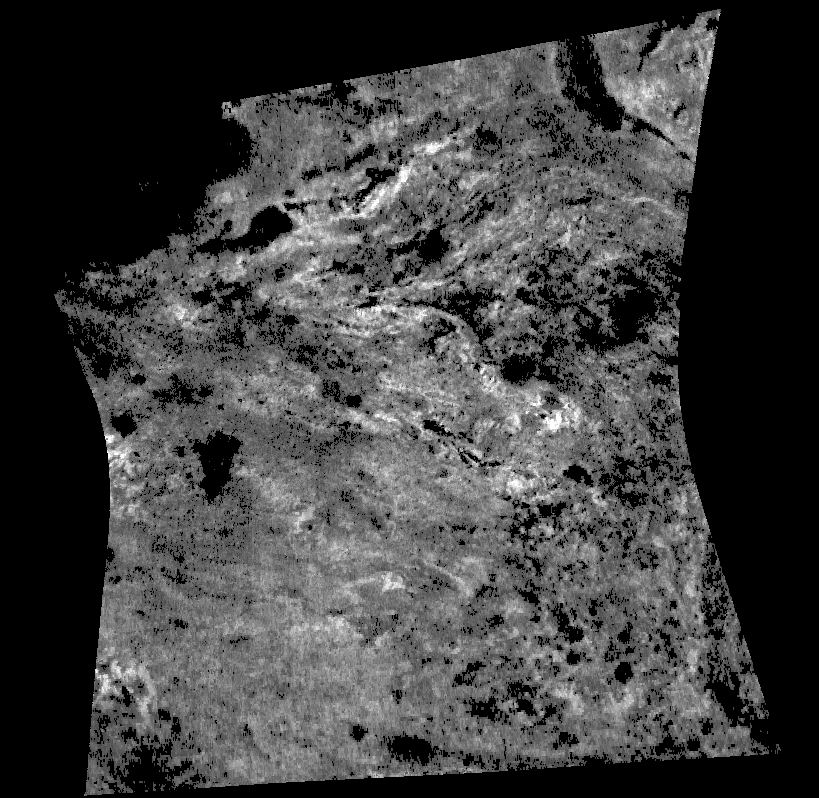

In [63]:
y14 = Image.open("4_D2300_Thresholded.png")
y14

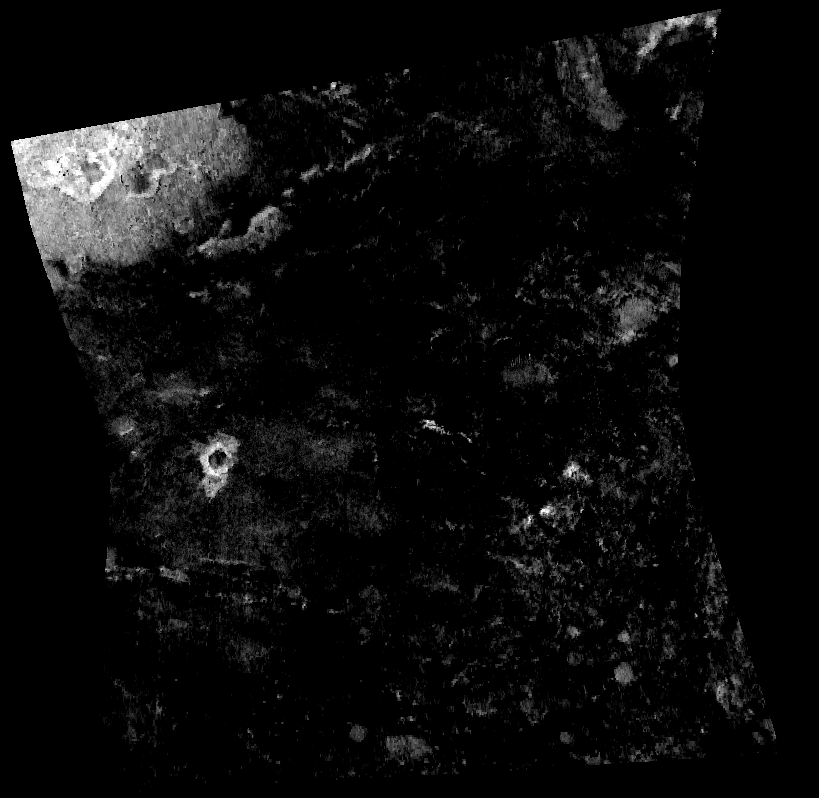

In [64]:
y15 = Image.open("5_HCPINDEX2_Thresholded.png")
y15

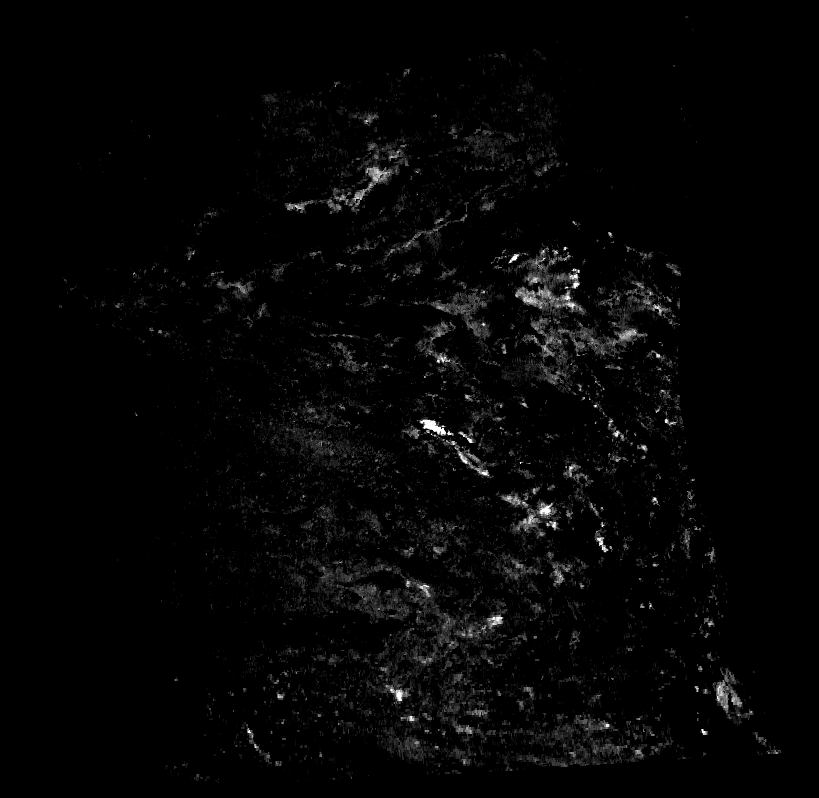

In [65]:
y16 = Image.open("6_LCPINDEX2_Thresholded.png")
y16

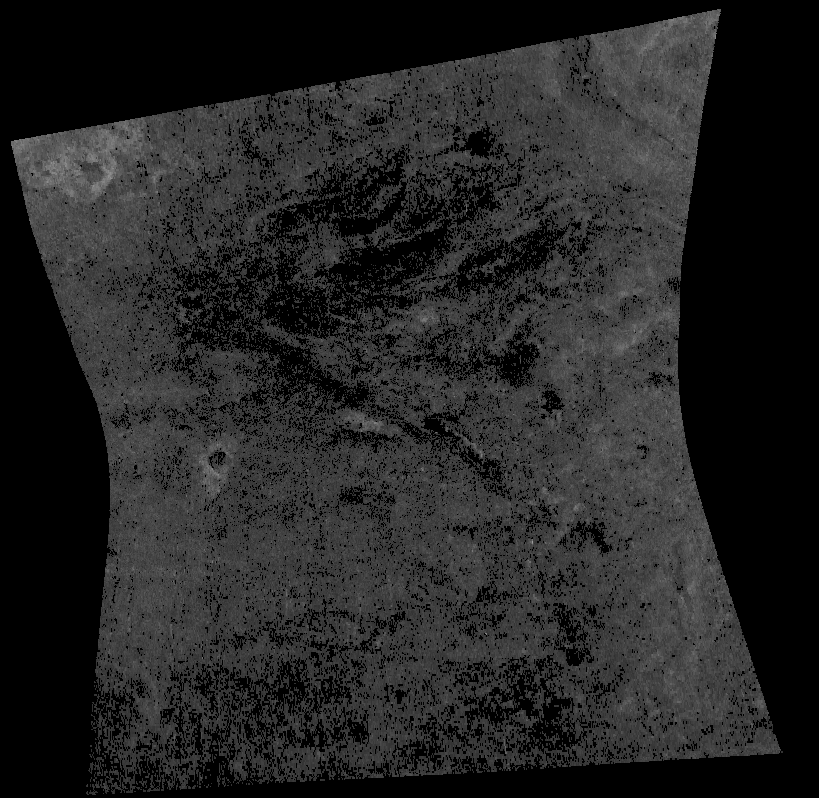

In [66]:
y17 = Image.open("7_OLINDEX3_Thresholded.png")
y17

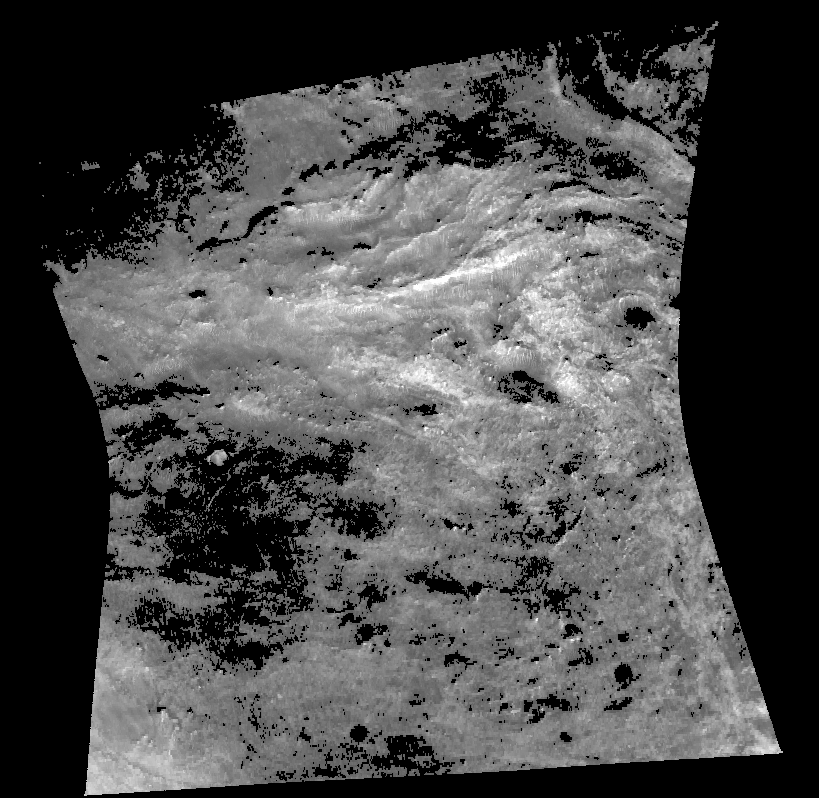

In [67]:
y18 = Image.open("8_R770_Thresholded.png")
y18

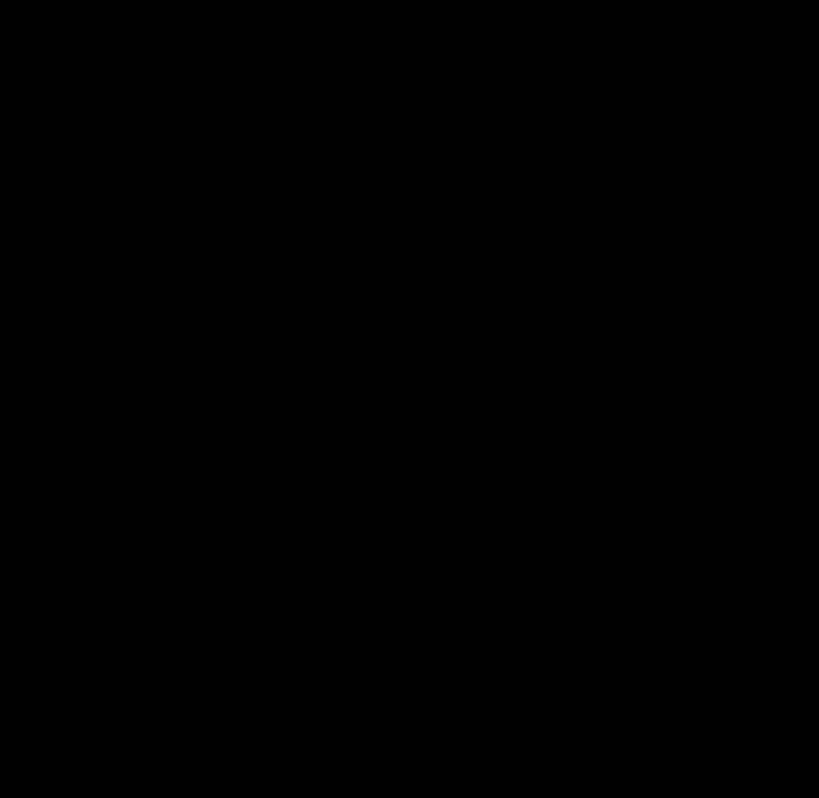

In [68]:
y19 = Image.open("9_SINDEX2_Thresholded.png")
y19

<h2 style ="font-family:Bell MT;font-size:80px:text-align:center"> Now let's flatten the image <h2/>

In [52]:
Sam_px = arr.flatten()
Sam_px.shape

(319591818,)

<p style ="font-family:Bell MT;font-size:80px:text-align:center"> 1. If we said the rows (samples) of the image is the spectrum of each pixel so a value of "319591818" is our row or sample value.But this pixel value is 
from all indexs not only from 9 bands, (I think we should extract the same wavelength bands with our "Y" value which has same information (parameter) then flatten it, and the value of our sample with the predicted "Y". will be the same) <p/>
<p style ="font-family:Bell MT;font-size:80px:text-align:center"> 2. In the case of feature (a column which is our predictor variables), the value of is 489 wavelength bands or indexs should be our column value. <p/>

<p style ="font-family:Bell MT;font-size:80px:text-align:center"> Since all the 9 bands has the same x and y value we can flatten one of the index out of them and flatten it then multiplying with 9
will give us the whole number of the pixels in those 9 bands. As we can see below the value of whole 9 bands pixel is '653562' so the value of the our sample should be equal with this.As we can see the total value of the pixels are '5882058'.<p/>

In [88]:
y18_ar = plt.imread('8_R770_Thresholded.png') # To flatten an image the image should be change in to imagearray
y18_ar_fl = y18_ar.flatten()
y18_ar_fl.shape

(653562,)

In [89]:
tot_pix = 653562 * 9
tot_pix

5882058

<p style ="font-family:Bell MT;font-size:80px:text-align:center"> 3. What is the similarity between spectra signatures (which is plotted above) tells us? (what can we conclude based on those plotting?) <p/>
<p style ="font-family:Bell MT;font-size:80px:text-align:center"> 4. In General, what kind of information one might get from those spectral images and the extracted or sliced wavelength band (index)<p/>
<p style ="font-family:Bell MT;font-size:80px:text-align:center"> 5. do we need some prepoccess on the predictor image which we will extract (same 9 indexs with our "Y" value.) from the image cube, before implementing the machine learnning?<p/> 
<p style ="font-family:Bell MT;font-size:80px:text-align:center"> 6. Does band 9 (y19) have any problem? becouse the tresholded image shows totaly black. <p/>
<p style ="font-family:Bell MT;font-size:80px:text-align:center"> 7. Is there any other staff to do before trainning the machine other than what we have discussed last time? <p/>
<p style ="font-family:Bell MT;font-size:80px:text-align:center"> 8. Some of the codes didn't work properly like visualizing the whole image data cube and visualizing the whole spectra associated with their wavelength. <p/>  